In [1]:
from sklearn.datasets import make_classification
import numpy as np

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=20)

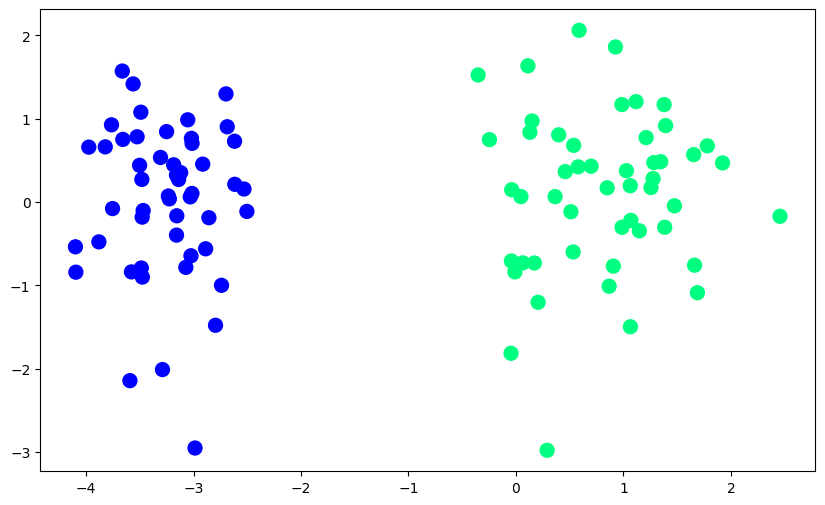

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)

In [4]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None, solver='sag')
lor.fit(X,y)

C:\Users\Admin-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [5]:
print(lor.coef_)
print(lor.intercept_)

[[4.77406308 0.20762377]]
[5.73916976]


In [6]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [7]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [13]:
def sigmoid(z) :
    return 1/(1 + np.exp(-z))

def gd(X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5

    for i in range(1000) :
        y_hat = sigmoid(np.dot(X, weights))
        weights = weights + lr*(np.dot((y - y_hat), X)/X.shape[0])

    return weights[1:], weights[0]

In [14]:
coef_, intercept_ = gd(X, y)

In [15]:
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

In [16]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

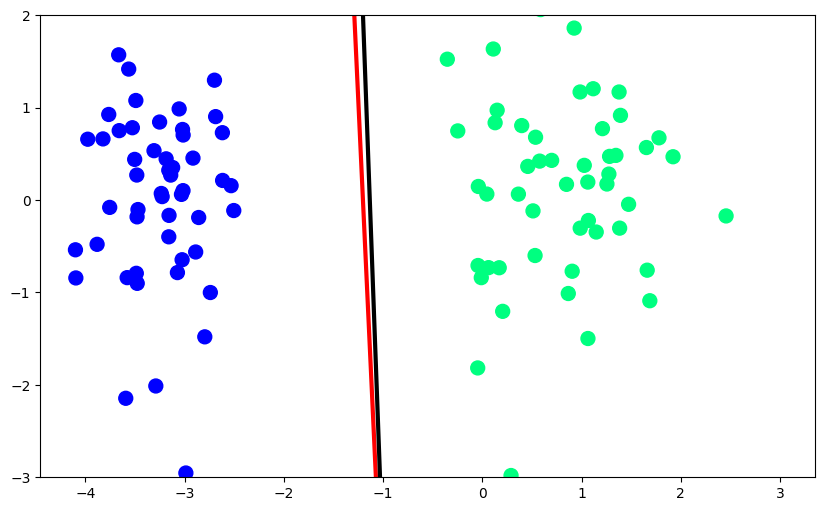

In [17]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)